# Problem Statement :

# SMS Spam Detection using Natural Language Processing with Python

# Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score


# 1.Data Gathering

In [2]:
df = pd.read_csv("../data/SMSSpamData", sep = '\t', names = ['Label','Msg'] )
df.head()

,Label,Msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 2. Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   Msg     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.isna().sum()

Label    0
Msg      0
dtype: int64

In [5]:
df['Label'].value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
df['Total Words'] = df['Msg'].apply(lambda x: len(x.split()))

In [7]:
df.head()

,Label,Msg,Total Words
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


C:\Users\sudwa\AppData\Local\Temp\ipykernel_4688\426599651.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = df['Total Words'], hue= df['Label'], palette= 'winter', shade = True)


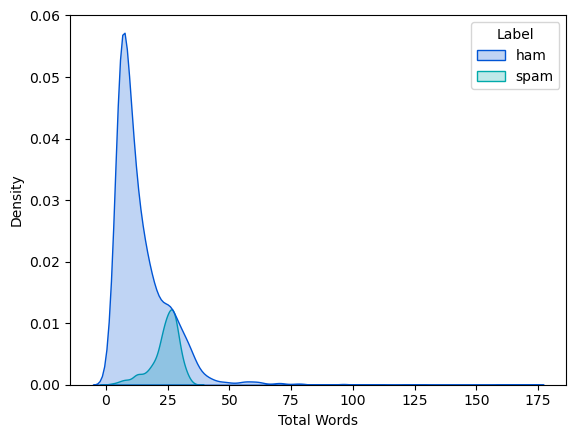

In [8]:
# plt.figure(figsize = (8, 8))
sns.kdeplot(x = df['Total Words'], hue= df['Label'], palette= 'winter', shade = True)
plt.show()

# 3. Data Preprocessing

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sudwa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
corpus = []
lm = WordNetLemmatizer()
for i in range (len(df)):
    review = re.sub('^a-zA-Z0-9',' ',df['Msg'][i])
    review = review.lower()
    review = review.split()
    review = [data for data in review if data not in stopwords.words('english')]
    review = [lm.lemmatize(data) for data in review]
    review = " ".join(review)
    corpus.append(review)    

In [11]:
df['Msg'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [12]:
len(df['Msg'])

5572

In [13]:
len(corpus)

5572

In [14]:
df['Msg']=corpus
df.head()

,Label,Msg,Total Words
0,ham,"go jurong point, crazy.. available bugis n gre...",20
1,ham,ok lar... joking wif u oni...,6
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,28
3,ham,u dun say early hor... u c already say...,11
4,ham,"nah think go usf, life around though",13


# 4. Modeling / Data

## 4.1 Data Splitting

In [15]:
x = df['Msg']
y = df['Label']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [17]:
len(x_train), len(y_train)

(4457, 4457)

In [18]:
len(x_test),len(y_test)

(1115, 1115)

## 4.2 Vectorization (Convert Text Data Into The Vectors)

In [19]:
tf_obj = TfidfVectorizer()
x_train_tfidf = tf_obj.fit_transform(x_train).toarray()
x_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
x_train_tfidf.shape

(4457, 7430)

In [21]:
tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train_feat = tfidf.fit_transform(x_train).toarray()
X_test_feat = tfidf.transform(x_test).toarray()

In [22]:
X_train_feat


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
print(X_test_feat.shape)

(1115, 2500)


In [24]:
cv = CountVectorizer(max_features = 1500)
cv.fit(x_train)
X_train_cv = cv.transform(x_train)
X_train_cv
X_test_cv = cv.transform(x_test)
X_test_cv

<1115x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 7333 stored elements in Compressed Sparse Row format>

## 5 Models Building

### 5.1 Models with CountVector

In [28]:
# Random forest Classification cv
rf = RandomForestClassifier(n_estimators= 300)
rf.fit(X_train_cv,y_train)
y_rf = rf.predict(X_test_cv)
print('Random Forest Accuracy: ', accuracy_score( y_rf , y_test))

Random Forest Accuracy:  0.9856502242152466


In [27]:
# Decision tree Classification cv
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=252)
dtc.fit(X_train_cv,y_train)
y_dtc = dtc.predict(X_test_cv)
print('Decision Tree Accuracy: ',accuracy_score(y_test,y_dtc))

Decision Tree Accuracy:  0.9748878923766816


In [25]:
# Naive bayes classification cv
mnb = MultinomialNB(alpha = 0.5)
mnb.fit(X_train_cv,y_train)
y_mnb = mnb.predict(X_test_cv)
print('Naive Bayes Accuracy: ', accuracy_score( y_mnb , y_test))

Naive Bayes Accuracy:  0.9856502242152466


In [26]:
# SVM Classification cv
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train_cv,y_train)
y_svc = svc.predict(X_test_cv)
print('SVM Accuracy: ', accuracy_score( y_svc , y_test))

SVM Accuracy:  0.9417040358744395


#### With CountVector Random Forest and MultinomialNB has better accuracy

### 5.2 Models with tfidf

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

def train_model(model):
    model.fit(X_train_feat, y_train)
    y_pred = model.predict(X_test_feat)
    y_prob = model.predict_proba(X_test_feat)[:, 1]

    accuracy = round(accuracy_score(y_test, y_pred))
    precision = round(precision_score(y_test, y_pred, pos_label='spam'))
    recall = round(recall_score(y_test, y_pred, pos_label='spam'), 3)

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')

    cm = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])
    
    fig, ax = plt.subplots(1, 2, figsize=(8, 6))

    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'], ax=ax[0])
    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('True')

    fpr, tpr, _ = roc_curve(y_test == 'spam', y_prob)
    roc_auc = auc(fpr, tpr)
    ax[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_title('ROC Curve')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].legend(loc='lower right')

    plt.tight_layout()
    plt.show()


Accuracy: 1
Precision: 1
Recall: 0.872


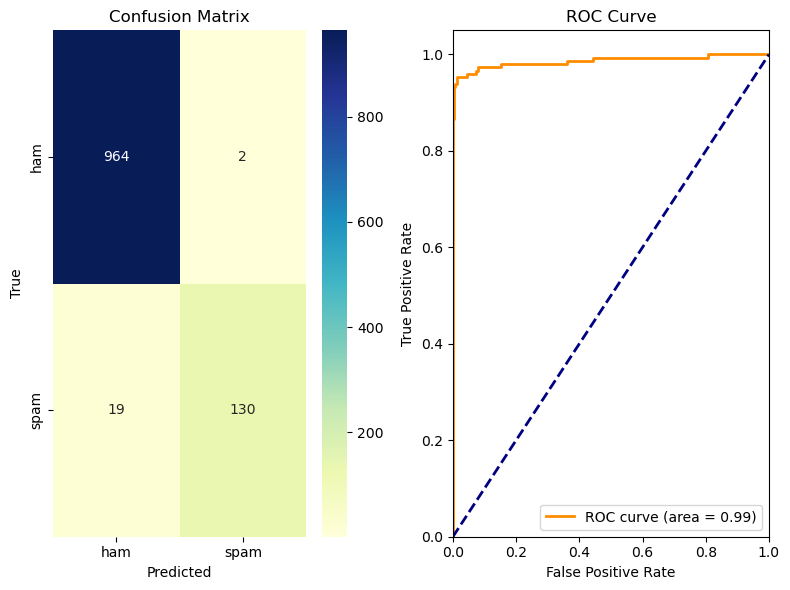

In [33]:
nb = MultinomialNB()
train_model(nb)

Accuracy: 1
Precision: 1
Recall: 0.886


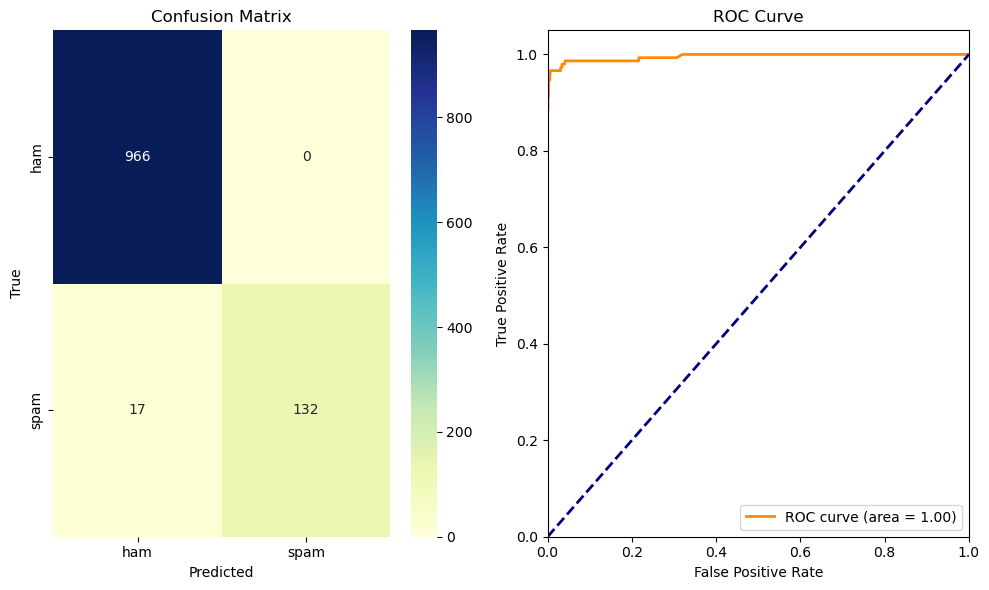

In [31]:
rf = RandomForestClassifier(n_estimators= 300)
train_model(rf)

## 6. Model Evaluation: Pipeline

In [34]:
text_mnb = Pipeline([('tfidf',TfidfVectorizer()),('mnb',MultinomialNB())])

In [35]:
text_mnb.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [36]:
#Accuracy Score on Testing Data
y_pred_test = text_mnb.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred_test)*100)

Accuracy Score: 97.39910313901345


In [37]:
#Accuracy Score on Training Data
y_pred_train = text_mnb.predict(x_train)
print("Accuracy Score:",accuracy_score(y_train,y_pred_train)*100)

Accuracy Score: 98.00314112631816


In [38]:
#Confusion Matrix on Testing Data
y_pred_test = text_mnb.predict(x_test)
print("Confusion Matrix on Test Data:\n", confusion_matrix(y_test,y_pred_test))

Confusion Matrix on Test Data:
 [[966   0]
 [ 29 120]]


In [39]:
#Classification Report on Testing Data
y_pred_test = text_mnb.predict(x_test)
print("Classification Reportx on Test Data:\n", classification_report(y_test,y_pred_test))

Classification Reportx on Test Data:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



# 7. Prediction on User_data 

In [40]:
def preprocess_data(text):
    review = re.sub('^a-zA-Z0-9',' ',text)
    review = review.lower()
    review = review.split()
    review = [data for data in review if data not in stopwords.words('english')]
    review = [lm.lemmatize(data) for data in review]
    review = " ".join(review)
    return [review]

In [41]:
user_data = df['Msg'][1]
print(user_data)
user_data = preprocess_data(user_data)
user_data

ok lar... joking wif u oni...


['ok lar... joking wif u oni...']

In [43]:
text_mnb.predict(user_data)[0]

'ham'

## 8. Model deployment

In [45]:
import joblib

joblib.dump(text_mnb,'model.joblib')

['model.joblib']

In [47]:
loaded_model = joblib.load('model.joblib')

In [48]:
class prediction:
    
    def __init__(self,data):
        self.data = data
        
    def user_data_preprocessing(self):
        lm = WordNetLemmatizer()
        review = re.sub('^a-zA-Z0-9',' ',self.data)
        review = review.lower()
        review = review.split()
        review = [data for data in review if data not in stopwords.words('english')]
        review = [lm.lemmatize(data) for data in review]
        review = " ".join(review)
        return [review]
    
    def user_data_prediction(self):
        preprocess_data = self.user_data_preprocessing()
        
        if loaded_model.predict(preprocess_data)[0] == 'spam':
            return 'This Message is Spam'
            
        else:
            return 'This Message is Ham'  

In [49]:
df.head()

,Label,Msg,Total Words
0,ham,"go jurong point, crazy.. available bugis n gre...",20
1,ham,ok lar... joking wif u oni...,6
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,28
3,ham,u dun say early hor... u c already say...,11
4,ham,"nah think go usf, life around though",13


In [50]:
user_data = df['Msg'][3]
print(user_data)
prediction(user_data).user_data_prediction()

u dun say early hor... u c already say...


'This Message is Ham'

In [51]:
df.iloc[20]

Label                            ham
Msg            seriously spell name?
Total Words                        8
Name: 20, dtype: object

In [52]:
user_data = df['Msg'][20]
print(user_data)
prediction(user_data).user_data_prediction()

seriously spell name?


'This Message is Ham'

# 9. BERT pre-trained

In [15]:
!pip install tensorflow

In [16]:
# !pip install ipykernel

In [18]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Dropout, Input
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from transformers import BertTokenizer, TFBertModel
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# import matplotlib.pyplot as plt


In [19]:
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# def bert_encode(texts, max_len=60):
#     input_ids = []
#     attention_masks = []

#     for text in texts:
#         encoded = tokenizer.encode_plus(
#             text,
#             add_special_tokens=True,
#             max_length=max_len,
#             padding='max_length',
#             truncation=True,
#             return_attention_mask=True,
#             return_tensors='np'
#         )
#         input_ids.append(encoded['input_ids'][0])
#         attention_masks.append(encoded['attention_mask'][0])

#     return np.array(input_ids), np.array(attention_masks)


In [20]:
# Assume df has: 'message_clean', 'target_encoded' (0 = ham, 1 = spam)
# texts = df['message_clean'].tolist()
# targets = df['target_encoded'].values

# train_texts, test_texts, y_train, y_test = train_test_split(texts, targets, test_size=0.2, stratify=targets)

# train_input_ids, train_attention_masks = bert_encode(train_texts, max_len=60)
# test_input_ids, test_attention_masks = bert_encode(test_texts, max_len=60)


In [21]:
# def create_model(bert_model, max_len=60):
#     input_ids = Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
#     attention_masks = Input(shape=(max_len,), dtype=tf.int32, name='attention_masks')

#     bert_output = bert_model([input_ids, attention_masks])[1]  # pooled output
#     x = Dense(32, activation='relu')(bert_output)
#     x = Dropout(0.2)(x)
#     output = Dense(1, activation='sigmoid')(x)

#     model = Model(inputs=[input_ids, attention_masks], outputs=output)
#     model.compile(optimizer=Adam(learning_rate=2e-5), loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# bert_model = TFBertModel.from_pretrained('bert-base-uncased')
# model = create_model(bert_model, max_len=60)
# model.summary()


In [22]:
# history = model.fit(
#     [train_input_ids, train_attention_masks],
#     y_train,
#     validation_split=0.1,
#     epochs=3,
#     batch_size=16
# )


In [23]:
# def plot_learning_curves(history, metrics=[['loss', 'val_loss'], ['accuracy', 'val_accuracy']]):
#     fig, axes = plt.subplots(1, 2, figsize=(14, 5))
#     for ax, metric_pair in zip(axes, metrics):
#         for metric in metric_pair:
#             ax.plot(history.history[metric], label=metric)
#         ax.legend()
#         ax.set_title(metric_pair[0])
#     plt.tight_layout()
#     plt.show()

# plot_learning_curves(history)


In [24]:
# BERT Predictions
# bert_preds = (model.predict([test_input_ids, test_attention_masks]) > 0.5).astype("int32")

# print("BERT Accuracy:", accuracy_score(y_test, bert_preds))
# print(classification_report(y_test, bert_preds, target_names=['ham', 'spam']))

# Naive Bayes Accuracy (already done)
# print('Naive Bayes Accuracy:', accuracy_score(y_test, y_nb_pred))
